# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [100]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

np.random.seed(42)

In [101]:


df = pd.read_csv('data/human_body_temperature.csv')

### Shape of the data

In [102]:
df.shape

(130, 3)

* Data cosists of 130 observations and 3 column variables.

In [103]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


* Data consists of 3 columns - 2 of them are Numeric and the third is object.
* There is no missing data. Every column has 130 entries
* Gender column can probably be changed to a category

In [105]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


#### Categorical Data

In [106]:
df['gender']=df['gender'].astype('category')

#### Checking for any outliers

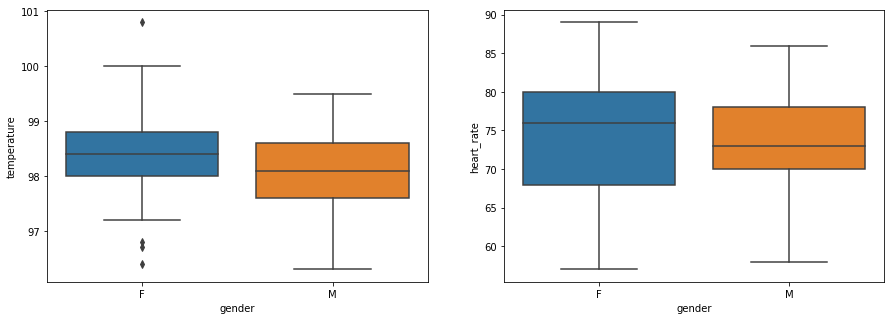

In [107]:
# Box plots of the numeric columns
f, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x='gender', y='temperature', data = df, ax=axes[0])
sns.boxplot(x='gender', y='heart_rate', data = df, ax=axes[1])

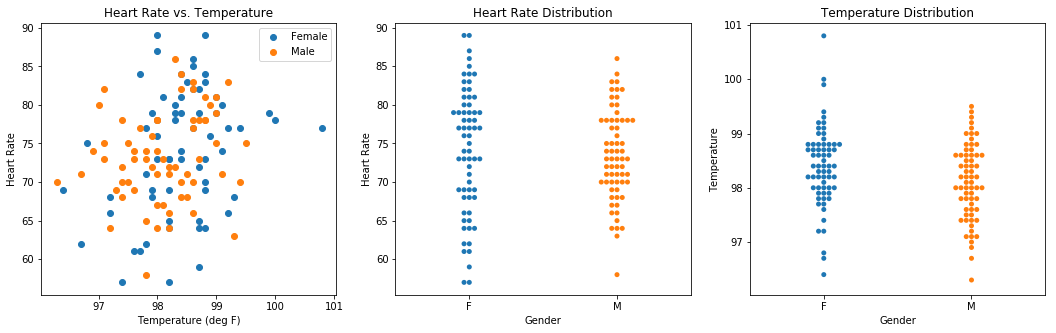

In [108]:
# Scatter and swarm plots 
f, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].scatter(df[df.gender=='F'].temperature, df[df.gender=='F'].heart_rate)
axes[0].scatter(df[df.gender=='M'].temperature, df[df.gender=='M'].heart_rate)
axes[0].set(title='Heart Rate vs. Temperature', xlabel='Temperature (deg F)', ylabel='Heart Rate')
axes[0].legend(('Female', 'Male'))
sns.swarmplot(x='gender', y='heart_rate', data = df, ax=axes[1])
axes[1].set(title='Heart Rate Distribution', xlabel='Gender', ylabel='Heart Rate')
sns.swarmplot(x='gender', y='temperature', data = df, ax=axes[2])
_ = axes[2].set(title='Temperature Distribution', xlabel='Gender', ylabel='Temperature')

#### Observations

* Female tends to have higher average body temperature and heart rate compared to Male
* There doesnt seem to be any correlation between Temperature and Heart Rate
* Higher spread/Larger variance in the Heart Rate in Female
* Box plot marks 4 outlier points in Female temperature (100.8 and 3 temperature < 97 F). However, those seem to be valid body temperature points. Hence, we will not remove them

### 1 Is the distribution of body temperatures normal?

In [109]:
# Mean and STD of the input data
mean_t, std_t = np.mean(df.temperature), np.std(df.temperature)
print('Mean of Temperature = %.2f' %mean_t)
print('STD of Temperature = %.3f' %std_t)

Mean of Temperature = 98.25
STD of Temperature = 0.730


#### Graphical Approach

In [110]:
def ecdf(data):
    '''Returns the ecdf of the input data'''
    x = np.sort(data)
    y = np.arange(1, len(data)+1)/len(data)
    return x, y

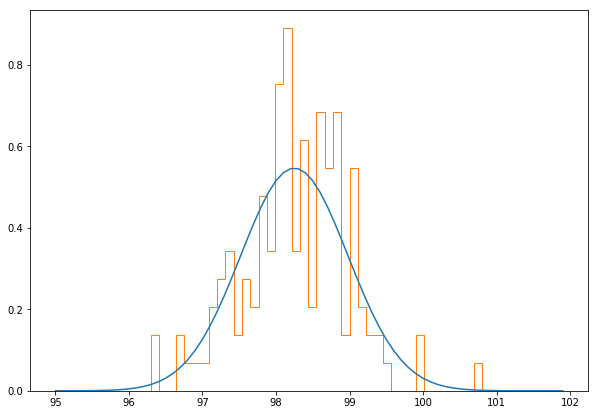

In [111]:
mean_t = np.mean(df.temperature)
std_t = np.std(df.temperature)
plt.figure(figsize=(10,7))
x=np.arange(95, 102, 0.1)
y=1/np.sqrt(2*np.pi*std_t**2)*np.e**(-(x-mean_t)**2/(2*std_t**2))
plt.plot(x,y)

plt.hist(df.temperature, density=True, histtype='step', bins=40)
plt.title='PDF'
plt.xlabel='Temperature' 
plt.ylabel='PDF'

plt.show()

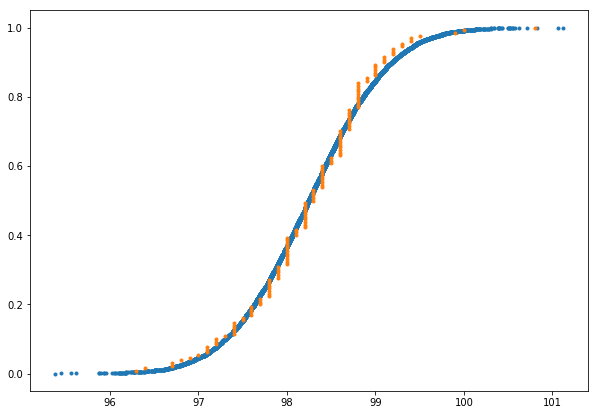

In [112]:
samples = np.random.normal(mean_t, std_t, size=10000)
x_theor, y_theor = ecdf(samples)
x_obs, y_obs = ecdf(df.temperature)

plt.figure(figsize=(10,7))
plt.plot(x_theor, y_theor, marker='.', linestyle='none')
plt.plot(x_obs, y_obs, marker='.', linestyle='none')
plt.title='ECDF'
plt.xlabel='Temperature'
plt.ylabel='ECDF'
plt.show()

* Number of sample points = 130 (very low), due to which, we see binning bias. Hence, pdf plot is not the best way to check for normal distribution.
* However, from the ECDF plot above, the curves seem to overlap reasonably well. So, the distribution could be normal

### 2 Is the sample size large? Are the observations independent?

* Sample size = 130. Large enough for Normal approximation via Central Limit Theorem (CLT requires n>30)
* Observations are obtained from different people at different time instances and can be treated as independent

### 3 Is the true population mean really 98.6 degrees F
* First, try a bootstrap hypothesis test.
* Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the  tt  or  zz  statistic?
* Now try using the other test. How is the result be different? Why?




#### Bootstrap hypothesis test¶
###### H0 = Null Hypothesis = True Mean Body Temperature = 98.6 degrees F

* Use a one-sample test since we have 1 set of sample temperature data and 1 hypothesis value (98.6) that we are testing for
* Since our H0 indicates mean = 98.6, we first shift the observed data such that the mean is 98.6

In [113]:
def draw_bs_rep(data, func, size=1):
    '''Returns size number of bootstrap replicates defined by func using the samples from data '''
    bs_reps = np.empty(size)
    for i in range(size):
        bs_sample = np.random.choice(data, len(data))
        bs_reps[i] = func(bs_sample)
    return bs_reps


In [114]:
# one-sample bootstrap testing H0 that the mean body temperature = 98.6
mean_obs, mean_h0 = np.mean(df.temperature), 98.6
temperature_shifted = df.temperature - mean_obs + mean_h0  # Shifting such that mean of data = 98.6
temperature_bs_reps = draw_bs_rep(temperature_shifted, np.mean, 50000) 
p = np.sum(temperature_bs_reps<=mean_obs)/len(temperature_bs_reps)
print('Mean Observed = %.2f' %mean_obs)
print('p-value for the observed mean = %.3e' %p)

Mean Observed = 98.25
p-value for the observed mean = 0.000e+00


#### Confidence interval of the observed mean


In [115]:
# Obtaining various confidence intervals for the observed mean
temperature_bs_reps = draw_bs_rep(df.temperature, np.mean, 50000)
conf_interval = np.percentile(temperature_bs_reps, [0.05, 0.5, 2.5, 97.5, 99.5, 99.95])
print('Mean Observed = %.2f' %mean_obs)
print('95%%   Confidence interval of Observed Mean = [%.2f, %.2f]' %(conf_interval[2], conf_interval[3]))
print('99%%   Confidence interval of Observed Mean = [%.2f, %.2f]' %(conf_interval[1], conf_interval[4]))
print('99.9%% Confidence interval of Observed Mean = [%.2f, %.2f]' %(conf_interval[0], conf_interval[5]))

Mean Observed = 98.25
95%   Confidence interval of Observed Mean = [98.12, 98.37]
99%   Confidence interval of Observed Mean = [98.08, 98.41]
99.9% Confidence interval of Observed Mean = [98.04, 98.46]


#### Observations
* Very low p-value (close to 0) indicates that the observed mean is very unlikely (0-probability) if we were to assume H0 is true. This seems to indicate that our H0 hypothesis might be incorrect
* In line with the low-p value, the hypothesised temperature 98.6 is outside the 99.9% confidence interval of the observed mean, which again indicates that our H0 hypothesis might be incorrect
* there are might be other correlated factors that could have biased these observations?

#### Frequentist Statistical Testing
* Use a one-sample test since we have 1 set of sample temperature data and 1 hypothesis value (98.6) that we are testing for
* We do not have the true standard deviation, and hence we would use the standard deviation obtained from the observed data samples. Thus, it would make more sense to use t-statistic. However, since number of samples n>30 both z and t statistic should give more or less identical result

#### Analysis using Z-statistic
z-statistic = (mean observed - H0)/(std of temperature) std of temperature ~ (std of observed data)/sqrt(n)

In [116]:
# Computing p-value of the observed data using z-statistics
zt_statistic = (mean_obs-mean_h0)/np.std(df.temperature)*np.sqrt(len(df.temperature))
print('Z statistic for the observed data assuming H0 = 98.6 = %.3f' %zt_statistic)
print('p-value using z-statistic table = Probability (z <= %.3f) = %.3e' %(zt_statistic, 2*st.norm.cdf(zt_statistic)))

Z statistic for the observed data assuming H0 = 98.6 = -5.476
p-value using z-statistic table = Probability (z <= -5.476) = 4.352e-08


#### Analysis using t-statistic

t-statisitic requires another input = degrees of freedom. The degrees of freedom for t-statistic = 130 (number of observations)


In [117]:
# Computing p-value of the observed data using t-statistics
print('T statistic for the observed data assuming H0 = 98.6 = %.3f' %zt_statistic)
print('p-value using t-statistic table = Probability (t <= %.3f) = %.3e' %(zt_statistic, 2*st.t.cdf(zt_statistic, len(df.temperature))))

T statistic for the observed data assuming H0 = 98.6 = -5.476
p-value using t-statistic table = Probability (t <= -5.476) = 2.165e-07


### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
* Which one is the correct one to use?
* What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

Unless the entire data set is normally distributed, the smaller sample set wouldnt be normally distributed. Hence t-statistic would be the right one to use.
Problem Statement: Using a sample size of 10, what is the p-value to obtain 98.6 degree F

In [118]:
sample_dataset = np.random.choice(df.temperature, 10) # Sample set of 10 temperatures


In [119]:
# Obtaining p-value from z-statistic and t-statistic table
zt_statistic = (mean_obs-mean_h0)/np.std(sample_dataset)*np.sqrt(len(sample_dataset))
print('T/Z statistic for the observed data assuming H0 = 98.6 = %.3f' %zt_statistic)
print('p-value using z-statistic table = Probability (z <= %.3f) = %.3f' %(zt_statistic, 2*st.norm.cdf(zt_statistic)))
print('p-value using t-statistic table = Probability (t <= %.3f) = %.3f' %(zt_statistic, 2*st.t.cdf(zt_statistic, len(sample_dataset))))

T/Z statistic for the observed data assuming H0 = 98.6 = -1.488
p-value using z-statistic table = Probability (z <= -1.488) = 0.137
p-value using t-statistic table = Probability (t <= -1.488) = 0.168


#### Observations
* Using smaller samples, our confidence value is low. Hence larger confidence interval. Thus, H0 hypothesis (true body temperature is 98.6) is true.
* From the above, we can say that the z-statistic result tends to under-estimate the confidence interval and p-value. T-statistics compensates for the lower 'n' sample size.

### 5. At what temperature should we consider someone's temperature to be "abnormal"?
* As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
* Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

#### Bootstrap Method
* H0 hypothesis: The temberature is normal (or not abnormal)
* Use two-tailed comparison, i.e., both too low and too high temperature considered 'abnormal'.
* Let us consider a significance level of 5% to categorize someone's temperature as 'abnormal', i.e., abnormal if Pr(The temperature occuring assuming H0) < 5%

#### Margin of Error and Confidence Interval

In [120]:
# Bootstrapping. Here each bootstrap replicates are individual user temperature (not the mean of 130 users)
temperature_bs_reps = np.empty(10000) # Generate bootstrap replicates from the provided data
for i in range(10000): 
    temperature_bs_reps[i] = np.random.choice(df.temperature, 1) # For a single individual
conf_interval = np.percentile(temperature_bs_reps, [2.5, 97.5])
margin_of_error = (conf_interval[1]-conf_interval[0])*0.5
print('Margin of Error (Bootstrap Method) = %.3f' %margin_of_error)
print('95%% Confidence interval of an Individuals Temperature (Bootstrap Method) = [%.2f, %.2f]' %(conf_interval[0], conf_interval[1]))

Margin of Error (Bootstrap Method) = 1.400
95% Confidence interval of an Individuals Temperature (Bootstrap Method) = [96.70, 99.50]


#### Frequentist Method

###### Obtaining the 95% confidence interval for mean temperature.

* confidence_interval = mean(data_set) +/- margin_of_error
* where margin_of_error = z * std(data_set)/sqrt(num_samples_in_data_set)
* where 'z' corresponds to the z-value required to obtain a 95% confidence level

In [121]:
# Frequentist method to obtain the abnormal temperature
z_value = st.norm.ppf(.975) # 95% confidence = 2.5% margin at either ends
margin_of_error = z_value*np.std(df.temperature)/1.0
conf_interval = [np.mean(df.temperature)-margin_of_error, np.mean(df.temperature)+margin_of_error]
print('Margin of Error (Frequentist Method) = %.3f' %margin_of_error)
print('95%% Confidence interval of an Individuals Temperature (Frequentist Method) = [%.2f, %.2f]' %(conf_interval[0], conf_interval[1]))

Margin of Error (Frequentist Method) = 1.431
95% Confidence interval of an Individuals Temperature (Frequentist Method) = [96.82, 99.68]


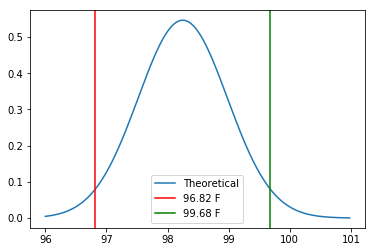

In [122]:
#Plot to show the normal body temperature range
mu, sigma = np.mean(df.temperature), np.std(df.temperature)
x=np.arange(96, 101, 0.02)
y=1/np.sqrt(2*np.pi*sigma**2)*np.e**(-(x-mu)**2/(2*sigma**2))
plt.plot(x, y)
plt.axvline(x=conf_interval[0], color='red')
plt.axvline(x=conf_interval[1], color='Green')
plt.title = "Normal Body Temperature"
plt.xlabel = 'Temperature' 
plt.ylabel = 'PDF'
plt.legend(('Theoretical', "{0:.2f} F".format(conf_interval[0]), "{0:.2f} F".format(conf_interval[1])))
plt.show()

#### Observations
* We see a small difference in the values obtained by Bootstrap method and Frequentist Method. This is due to the granularity of the samples in the data. temperature_bs_reps contains only from the 130 values in the temperature array. And 2.5 and 97.5 percentile values are obtianed from temperature_bs_reps array.
* The normal temperature range for an individual is the 95% confidence interval for an individual = [96.82,99.68] F

### 6. Is there a significant difference between males and females in normal temperature?
###### We saw early on that there was a difference in the mean temperatures between male and female. Is this difference significant?

* H0: The mean temperature for male and female are same (Note: Nothing is claimed about the distribution. Hence, we have to sample male and female data separately)
* We will use the two-sample bootstrap test and two-sample t-test to validate the above hypothesis
* Permutation method cannot be used since male and female samples cannot be combined (distributions might be different)

#### Two-sample Bootstrap

In [123]:
# Two sample bootsrap. H0 = difference between male and female mean temperature are the same
temperature_m, temperature_f = df[df.gender=='M'].temperature, df[df.gender=='F'].temperature
mean_t, mean_m, mean_f = np.mean(df.temperature), np.mean(temperature_m), np.mean(temperature_f)
# Shifting the distribution so that both male and female data have same mean temperature
temperature_m_shifted = temperature_m - mean_m + mean_t 
temperature_f_shifted = temperature_f - mean_f + mean_t
mean_diff_obs = mean_f-mean_m 

temperature_bs_reps_m = draw_bs_rep(temperature_m_shifted, np.mean, 50000)
temperature_bs_reps_f = draw_bs_rep(temperature_f_shifted, np.mean, 50000)
temperature_bs_reps = temperature_bs_reps_f-temperature_bs_reps_m
p = np.sum(np.abs(temperature_bs_reps)>=np.abs(mean_diff_obs))/len(temperature_bs_reps)
print('Mean Observed = %.3f' %mean_diff_obs)
print('p-value for the observed mean = %.4f' %p)

Mean Observed = 0.289
p-value for the observed mean = 0.0226


#### Two sample t-test (Frequentist Method)
* H0: The mean temperature for male and female are same, i.e., t_m - t_f = 0
* Goal is to compute the p-value for the observed data. If the p-value is low, then there is significant difference between men and women temperature
* Observed mean difference = mean_diff_obs = t_m - t_f = 0.289
* t-statistic = (mean_diff_obs - mean_h0)/std(temp_fm)* sqrt(n)
* Here distribution temp_fm = temp_f - temp_m and n = 130/2 = 65

In [124]:

std_f_minus_m = np.sqrt(np.var(temperature_m)/len(temperature_m) + np.var(temperature_f)/len(temperature_f))
t_statistic = (mean_diff_obs - 0)/std_f_minus_m
print('T statistic for the observed data = %.3f' %t_statistic)
print('p-value using t-statistic table = Probability (t >= %.3f) = %.3f' %(t_statistic, 2*st.t.sf(t_statistic, len(df.temperature))))

T statistic for the observed data = 2.303
p-value using t-statistic table = Probability (t >= 2.303) = 0.023


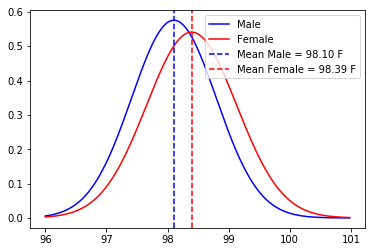

In [126]:
# Plot of female and male temperature as a normal distribution
mu_m, sigma_m = np.mean(temperature_m), np.std(temperature_m)
mu_f, sigma_f = np.mean(temperature_f), np.std(temperature_f)
x=np.arange(96, 101, 0.02)
y_m=1/np.sqrt(2*np.pi*sigma_m**2)*np.e**(-(x-mu_m)**2/(2*sigma_m**2))
y_f=1/np.sqrt(2*np.pi*sigma_f**2)*np.e**(-(x-mu_f)**2/(2*sigma_f**2))
plt.plot(x, y_m, color='blue', label='Male')
plt.plot(x, y_f, color='red', label='Female')
plt.axvline(x=mu_m, linestyle='--', color='blue', label='Mean Male = {0:.2f} F'.format(mu_m))
plt.axvline(x=mu_f, linestyle='--', color='red', label='Mean Female = {0:.2f} F'.format(mu_f))
plt.title ='Normal Body Temperature'
plt.xlabel = 'Temperature'
plt.ylabel = 'PDF'
plt.legend()
plt.legend(('Male', 'Female', 'Mean Male = {0:.2f} F'.format(mu_m), "Mean Female = {0:.2f} F".format(mu_f)))
plt.show()

#### Observations
* From the above, it seems like the observed statistic (female temperature-male temperature >0.29 F) is very unlikely (1.1%) if we were to assume H0 (both male and female avg temperatures are identical)
* This leads us to conclude that the H0 hypothesis is not true and can be rejected. Average female body temperature is not equal to that of men